In [310]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from copy import deepcopy
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import VotingClassifier

In [311]:
def discretization(x, feature, ranges):
    data = deepcopy(x)
    for i in range(len(ranges)):
        for j in range(len(data)):
            if ranges[i][0] <= data[feature][j] < ranges[i][1]:
                data[feature][j] = ranges[i][2]
    return data


def discretization_HGB(x, male_ranges, female_ranges):
    data = deepcopy(x)
    for i in range(len(male_ranges)):
        for j in range(len(data)):
            if data['Gender'][j] == 1:
                if male_ranges[i][0] <= data['HGB'][j] < male_ranges[i][1]:
                    data['HGB'][j] = male_ranges[i][2]
            elif data['Gender'][j] == 2:
                if female_ranges[i][0] <= data['HGB'][j] < female_ranges[i][1]:
                    data['HGB'][j] = female_ranges[i][2]
    return data

In [312]:
data = pd.read_csv("D:\Bachelor's final year\Second Semester\ML\project\HCV-Egy-Data.csv")
y_classes = pd.DataFrame(np.asarray(data['Baselinehistological staging']))
#data = data.drop('Baselinehistological staging', axis=1)

In [313]:
age_ranges = [[0, 32, 30], [32, 37, 35], [37, 42, 40], [42, 47, 45], [47, 52, 50], [52, 57, 55], [57, 63, 60]]
data = discretization(data, 'Age', age_ranges)

ast1_ranges = [[0, 20, 10], [20, 40, 30], [40, 129, 100]]
data = discretization(data, 'AST 1', ast1_ranges)

bmi_ranges = [[0, 18.5, 15], [185, 25, 20], [25, 30, 27], [30, 35, 33], [35, 41, 37]]
data = discretization(data, 'BMI', bmi_ranges)

wbc_ranges = [[0, 4000, 2000], [4000, 11000, 8000], [11000, 12102, 10000]]
data = discretization(data, 'WBC', wbc_ranges)

rbc_ranges = [[0, 3000000, 2000000], [3000000, 5000000, 4000000], [5000000, 5018452, 500500]]
data = discretization(data, 'RBC', rbc_ranges)

plat_ranges = [[93013, 100000, 95000], [100000, 255000, 200000], [255000, 226466, 226000]]
data = discretization(data, 'Plat', plat_ranges)

data = discretization(data, 'ALT 1', ast1_ranges)
data = discretization(data, 'ALT4', ast1_ranges)
data = discretization(data, 'ALT 12', ast1_ranges)
data = discretization(data, 'ALT 24', ast1_ranges)
data = discretization(data, 'ALT 36', ast1_ranges)
data = discretization(data, 'ALT 48', ast1_ranges)

rnabase_ranges = [[0, 5, 3], [5, 1201087, 10]]
data = discretization(data, 'RNA Base', rnabase_ranges)

rna4_ranges = [[0, 5, 3], [5, 1201716, 10]]
data = discretization(data, 'RNA 4', rna4_ranges)

rna12_ranges = [[0, 5, 3], [5, 3731528, 10]]
data = discretization(data, 'RNA 12', rna12_ranges)

rnaeot_ranges = [[0, 5, 3], [5, 808451, 10]]
data = discretization(data, 'RNA EOT', rnaeot_ranges)

data = discretization(data, 'RNA EF', rnaeot_ranges)

HGB_male_ranges = [[2, 14, 10], [14, 17.5, 15], [17.5, 21, 19]]
HGB_female_ranges = [[2, 12.3, 10], [12.3, 15.3, 15], [15.3, 21, 19]]
data = discretization_HGB(data, HGB_male_ranges, HGB_female_ranges)

In [314]:
data = data.drop('Baselinehistological staging',axis=1)

In [329]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.8, random_state=0)
sss.get_n_splits(data, y_classes)
for train_index, test_index in sss.split(data, y_classes):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_classes.iloc[train_index], y_classes.iloc[test_index]

In [185]:
clf = DecisionTreeClassifier()

In [182]:
clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=10) 

In [186]:
clf = clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
accuracy_score(predicted, y_test)

0.2446043165467626

In [212]:
plot_tree(clf)

In [152]:
dum1 = np.asarray(data['Baseline histological Grading'])
dum2 = np.asarray(y_classes)

In [166]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

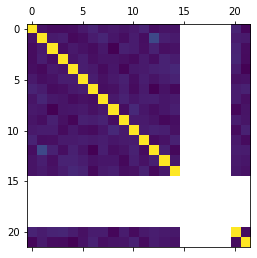

In [188]:
plt.matshow(data.corr())
plt.show

In [172]:
# averging the ALT
def alt_avg(x):
    data = deepcopy(x)
    for i in range(len(data)):
        data['ALT 1'][i] = data['ALT 1'][i] + data['ALT4'][i] + data['ALT 12'][i] + data['ALT 24'][i] + data['ALT 36'][i] + data['ALT 48'][i]
        data['ALT 1'][i] = data['ALT 1'][i]/6
    data = data.drop('ALT4', axis=1)
    data = data.drop('ALT 12', axis=1)
    data = data.drop('ALT 24', axis=1)
    data = data.drop('ALT 36', axis=1)
    data = data.drop('ALT 48', axis=1)
    data = data.drop('ALT after 24 w', axis=1)
    return data

new_data = alt_avg(data)
new_data.columns.values

array(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype=object)

In [191]:
new_data = new_data.drop('RNA EF', axis=1)
new_data = new_data.drop('RNA EOT', axis=1)
new_data = new_data.drop('RNA 12', axis=1)
new_data = new_data.drop('RNA 4', axis=1)
new_data = new_data.drop('RNA Base', axis=1)

In [192]:
new_data.columns.values

array(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype=object)

In [194]:
new_data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,47.342960,1.489531,29.066426,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,7591.335740,3.929252e+06,12.169675,194086.642599,99.191336,98.964621,9.761733,2.536462
std,8.652829,0.500071,4.452859,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,2078.776602,4.926994e+05,2.478976,24214.832119,7.482846,3.683982,4.023896,1.121392
min,35.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,5.005000e+05,10.000000,95000.000000,30.000000,70.000000,3.000000,1.000000
25%,40.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,6.000000,2.000000
50%,45.000000,1.000000,27.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,10.000000,3.000000
75%,55.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,13.000000,4.000000
max,60.000000,2.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,16.000000,4.000000


In [195]:
def class_data_map(dataset):
    class_column = dataset[dataset.columns[-1]]
    class_column_list = list(class_column)
    classes = class_column.unique()
    class_data_map = dict()
    for c in classes:
        class_data_map[c] = []
    for c in classes:
        for i in range(len(class_column_list)):
            if class_column_list[i] == c:
                class_data_map[c].append(dataset.loc[i])
    return class_data_map

In [196]:
c_d_map = class_data_map(new_data)

In [201]:
stage_1 = pd.DataFrame(c_d_map[1])
stage_2 = pd.DataFrame(c_d_map[2])
stage_3 = pd.DataFrame(c_d_map[3])
stage_4 = pd.DataFrame(c_d_map[4])

In [202]:
stage_4.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,Baseline histological Grading,Baselinehistological staging
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,3.620000e+02,362.000000,362.000000,362.000000,362.000000,362.000000,362.0
mean,46.864641,1.475138,28.558011,1.483425,1.527624,1.500000,1.508287,1.513812,1.513812,1.491713,7745.856354,3.941997e+06,12.237569,194779.005525,98.839779,98.972376,9.469613,4.0
std,8.316184,0.500073,4.430842,0.500417,0.499927,0.500692,0.500623,0.500501,0.500501,0.500623,1918.432810,4.474028e+05,2.489629,22855.824187,8.949335,3.986724,4.039338,0.0
min,35.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,5.005000e+05,10.000000,95000.000000,30.000000,70.000000,3.000000,4.0
25%,40.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,6.000000,4.0
50%,45.000000,1.000000,27.000000,1.000000,2.000000,1.500000,2.000000,2.000000,2.000000,1.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,9.000000,4.0
75%,55.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,13.000000,4.0
max,60.000000,2.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,16.000000,4.0


In [203]:
stage_1.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,Baseline histological Grading,Baselinehistological staging
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,3.360000e+02,336.000000,336.000000,336.000000,336.000000,336.000000,336.0
mean,47.068452,1.488095,29.136905,1.532738,1.464286,1.502976,1.523810,1.479167,1.467262,1.562500,7577.380952,3.895848e+06,12.291667,193437.500000,98.958333,99.142857,9.982143,1.0
std,8.933824,0.500604,4.447271,0.499671,0.499467,0.500737,0.500178,0.500311,0.499671,0.496818,2101.874143,5.955562e+05,2.495020,25454.359947,8.487993,3.095082,3.945106,0.0
min,35.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,5.005000e+05,10.000000,95000.000000,30.000000,88.000000,3.000000,1.0
25%,40.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,7.000000,1.0
50%,45.000000,1.000000,27.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,10.000000,1.0
75%,55.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,13.250000,1.0
max,60.000000,2.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,16.000000,1.0


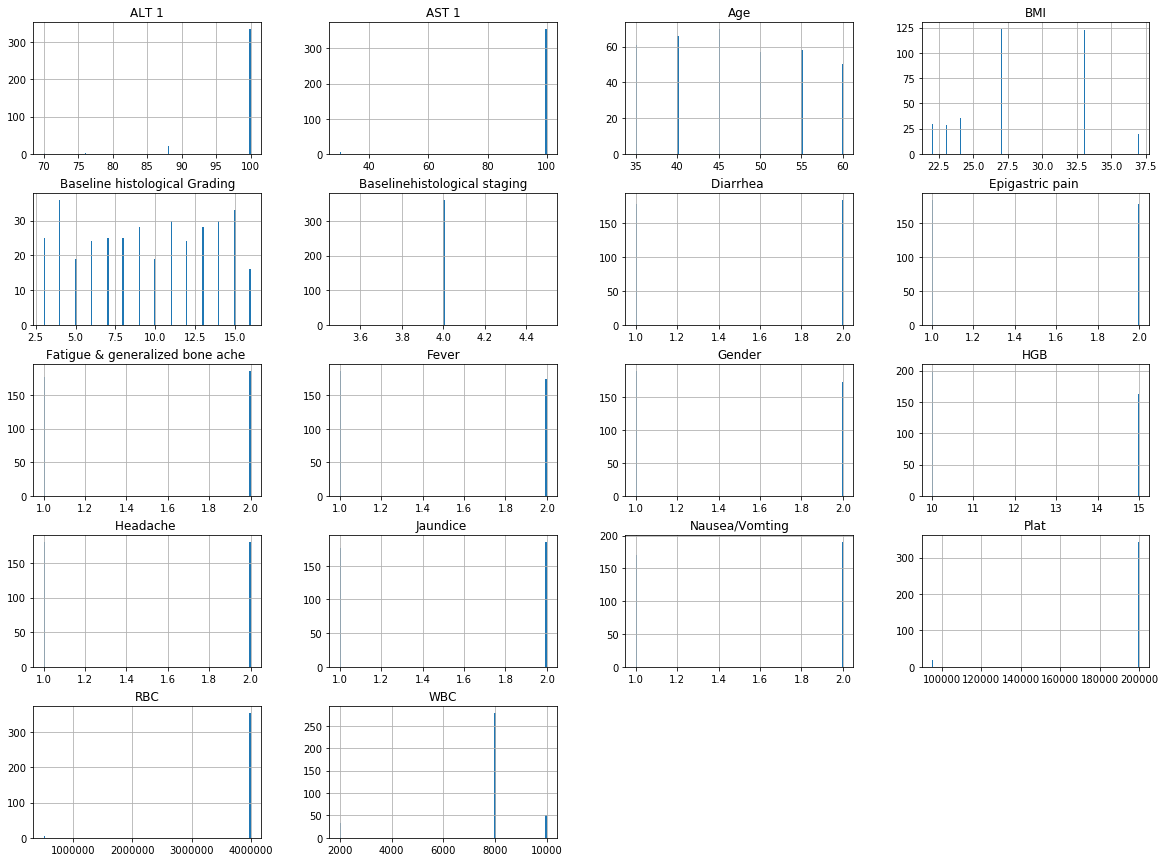

In [204]:
stage_4.hist(bins=150, figsize=(20,15))
plt.show()

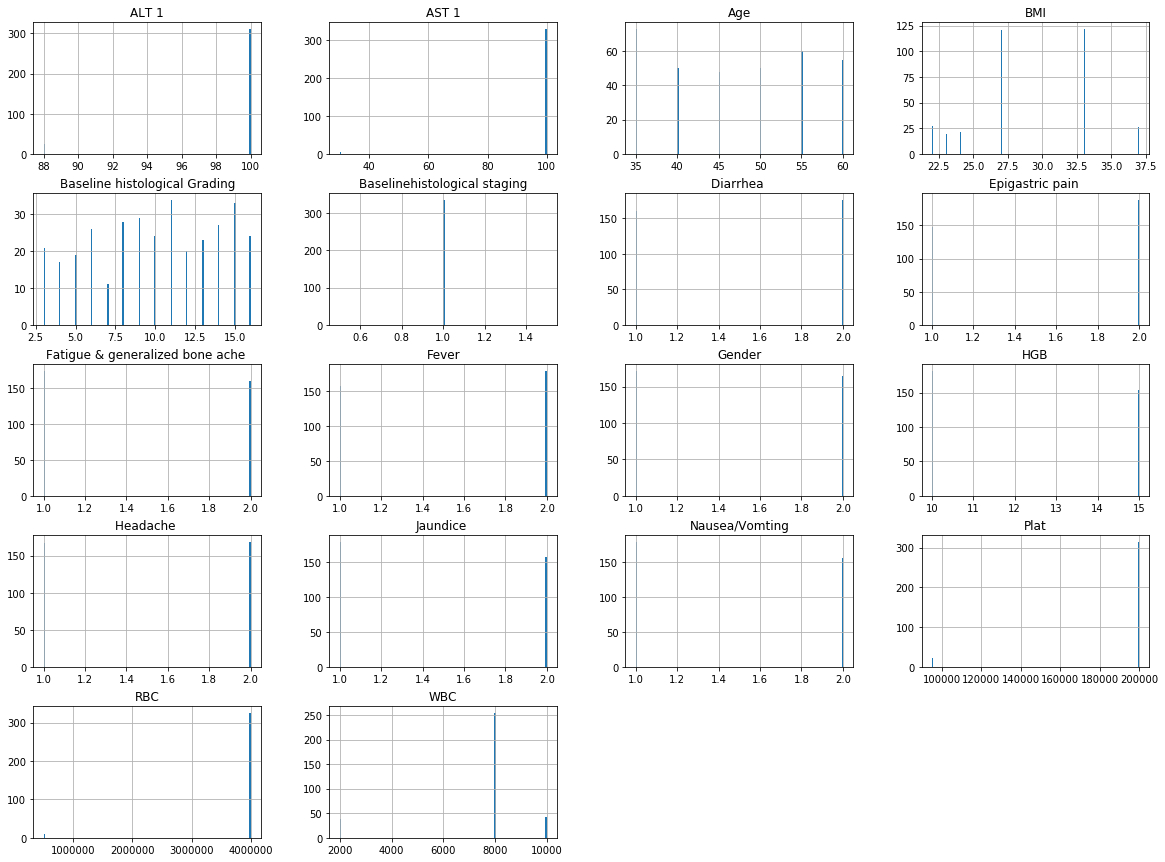

In [205]:
stage_1.hist(bins=150, figsize=(20,15))
plt.show()

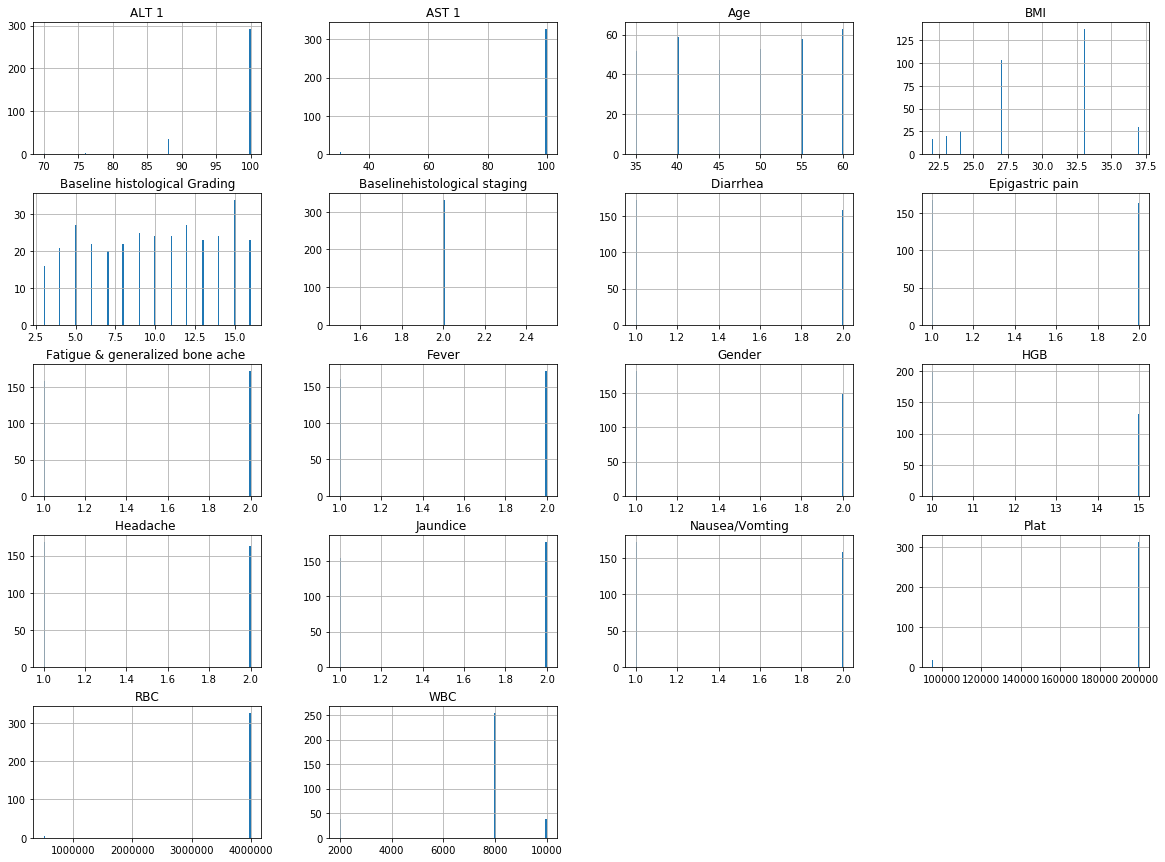

In [206]:
stage_2.hist(bins=150, figsize=(20,15))
plt.show()

In [321]:
from random import randint
def get_estimators_predictions(x, y, classifier, test):
    estimators = []
    predictions = []
    features = x.columns.values
    for i in range(len(test)):
        f = []
        myset = set()
        for j in range(22):
            f_num = randint(0,len(features)-1)
            while myset.issuperset([f_num]):
                f_num = f_num + 1
                if f_num > 27:
                    f_num = 0
            myset.add(f_num)
            f.append(features[f_num])
        x_copy = deepcopy(x)
        test_copy = deepcopy(test)
        for fi in f:
            x_copy = x_copy.drop(fi, axis=1)
            test_copy = test_copy.drop(fi, axis=1)
        clf = classifier
        clf = clf.fit(x_copy, y.values.ravel())
        clf_predictions = clf.predict(test_copy)
        predictions.append(clf_predictions)
        estimators.append(clf)
    return predictions

In [332]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pred = get_estimators_predictions(X_train, y_train, make_pipeline(StandardScaler(), SVC()), X_test)
predicted = make_prediction(pred)

In [333]:
accuracy_score(predicted, y_test)

0.2536101083032491

In [276]:
clf = VotingClassifier(estimators=est).fit(X_train, y_train.values.ravel())

In [277]:
predicted = clf.predict(X_train)

In [278]:
accuracy_score(predicted, y_train)

0.2640449438202247

In [279]:
def majority_element(num_list):
    idx, ctr = 0, 1
        
    for i in range(1, len(num_list)):
        if num_list[idx] == num_list[i]:
            ctr += 1
        else:
            ctr -= 1
            if ctr == 0:
                idx = i
                ctr = 1
        
    return num_list[idx]

In [306]:
def make_prediction(pred):
    predicted = []
    for i in range(len(pred)):
        lst2 = [item[i] for item in pred]
        predicted.append(majority_element(lst2))
    return predicted

In [308]:
predicted = make_prediction(est)
len(predicted)

100

In [309]:
len(y_test)

139

In [297]:
X_train.columns.values

array(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading'], dtype=object)

In [298]:
X_train.iloc[[1]]

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
1138,45,1,27,2,2,1,1,2,1,1,...,100,100,100,29,10,10,10,10,10,10
